# Utility

## Thought Experiment - 

Some examples. I can go find a simple one, but the point is

## Utility Theory

The above examples demonstrate how people can react to the same gamble in different ways because of personal details. Even if the expected value of a gamble is positive, the worth of that gamble will vary from person to person and even from time to time for the same person. Utility theory is a method of computing optimal decisions based on a person's willingness to accept different risks (Myerson and Zambrano, 2019). In utility theory, it is assumed that a rational decision maker has a utility function by which they judge the worth of different outcomes. In order to be useful and numerically modeled they follow a few assumptions. First, that (I don't know if I actually have to them in here...).

A common way to represent a person's utility function (when different payoffs are monetary) is with a risk tolerance formula $U(x) = -e^{(-x/r)}$, where $r$ is a positive number that represents a person's risk tolerance. For simplicity, we will also assume that an individual's risk tolerance

When using utility for decision making, we will want to do two things to make it useful. First, instead of calculating expected monetary value, we calculate expected utility based on the individual's utility function and the probabilities of each outcome. Second, we want to deal with numbers that have the same units, so after converting to utility, we will convert back to currency in order to find the *certainty equivalent*.

In [2]:
import numpy as np
def util(x, r):
    return -np.exp(-x/r)

In [3]:
util(100,1)

-3.720075976020836e-44

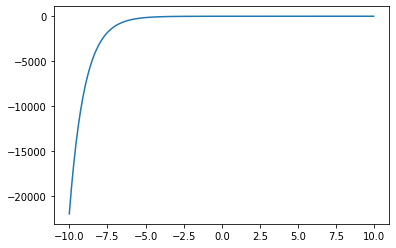

In [28]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,.05)
plt.plot(x, util(x,1))
plt.show()

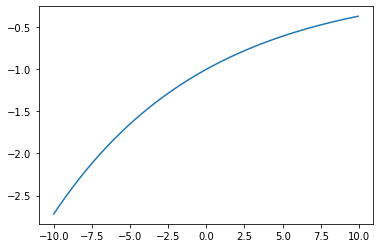

In [29]:
plt.plot(x, util(x,10))
plt.show()

As you can see, the line straightens out as $r$ increases ##TODO - add axis labels##. The more tolerant a person is to risks, the closer the person's utility is to being a straight line. A person whose utility function is a perfectly straight line is a *risk-neutral* decision maker. When a person is risk neutral, they will generally accept any gamble for the fair value. For example, a gamble that has a 50\% percent chance of paying out \\$2,000 and a 50\% chance of not paying out has an expected monetary value of \\$1,000. ##TODO - be sure to explain expected value in the probability bit## A risk-neutral decision maker would take this gamble if they were required to pay any amount less than \$1,000. Any amount greater and they would refuse. This is called the *certainty equivalent*, the most a decision maker would be willing to pay for a certain set of payoffs. But certainty equivalents are only interesting for decision maker's that are not risk-neutral and so we need a way to convert utility back to monetary units. For this, we reverse the operations performed on $x$ in our utility function and call the function *uinv*, short for utility inverse.

In [19]:
def uinv(y, r):
    return -np.log(-y)*r

uinv(util(1,1), 1)

1.0

Some special facts about our utility function is that utility will always be less than or equal to -1. Because of this, maximizing utility will be the same as bringing utility as close to zero (or making it the least negative) as possible. Also, the parameter $r$ for risk tolerance must always be positive. (If we were instead using a loss function, we would desire to make the loss as negative as possible). For simplicity's sake we will assume that risk tolerance stays the same for a person no matter what situation they are in.

### Example problem

Suppose that for a price, You are able to participate in a gamble. With 50\% probability the gamble will pay out \\$500, with 30\% probability it will pay out \\$100, and with 20\% probability you will not receive anything. If your risk tolerance is equal to 50, what is the most you would be willing to pay to take the gamble?

In [127]:
# First, we will define a little function that will compute the expected utility
# of a set of payoffs and their respective probabilities
def e_util(payoffs, probs, r):
    probs = probs/probs.sum() # This will guarantee the probability weights sum to 1
    return (util(payoffs, r)*probs).sum()

In [130]:
# Then we find expected utility with the new function and convert to dollars
payoffs = np.array([500, 100, 0])
probs = np.array([0.5, 0.3, 0.2])
r = 50
e_u = e_util(payoffs, probs, r)
uinv(e_u, r)

71.22613507523758

A: $71.23

## St. Petersburg Paradox

The St. Petersbug Paradox is another way to demonstrate the diminishing marginal returns imbued n a utility function. It is a gamble with an infinite expected value. It goes like this. The initial payoff is set to $1. Then a coin is tossed until you observe heads. For every toss, the payoff is doubled. the expected payoff is calculated like this:

\begin{align}
E(\text{Payoff}) &= .5 * 2 + .25 * 4 + .125 * 8 + .0625 * 16 + ... \\ 
E(\text{Payoff}) &= 1      + 1       + 1        + 1          + ... \\
E(\text{Payoff}) &= \infty
\end{align}

Because the probability of obtaining a certain number of tosses is halved for every additional tosses and the reward is doubled at each toss, this gamble has a theoretical expected payoff of infinite value. However, we can show using utility thoery that the expected payoff in a person's mind is much much less. This is because of the fact that every additional dollar a person gains provides less happiness than the additional dollar.

Take the same individual that had a risk tolerance of 50. Find the utility for each possible payoff, multiply by their respective probabilities, and sum to get the certainty equivalent of this individual. Compare this to the expected monetary value and we will see that the individual's expected gain from this gamble levels off at a particular value while the expected monetary value continues to increase linearly as we continue to add terms.

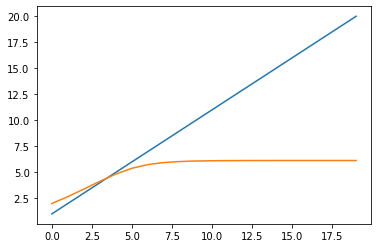

In [129]:
payoffs = np.array([2])
probs = np.array([.5])
r = 50

emvs = []
ces = []

for _ in range(20):
    emv = (payoffs * probs).sum() # Expected monetary value
    ce = uinv(e_util(payoffs, probs, 50), 50) # Certainty equivalent
    # print(emv, ce)
    emvs.append(emv)
    ces.append(ce)
    
    payoffs = np.append(payoffs, payoffs[-1]*2)
    probs = np.append(probs, probs[-1]*0.5)

plt.plot(range(20), emvs)
plt.plot(range(20), ces)
plt.show()

In [42]:
ces[-1]

6.135187043217972

The value of the coin toss gamble to this individual would not be infinite. Instead it would have a finite value of around \\$6.15. This is because even though the reward doubles with each coin flip, the utility of the outcome for this individual does not double. This will be true for any person who has a utility function of the same form.

I will also take this opportunity to demonstrate how powerful and applicable raw computational power is for analyzing probabilistic models like this one.

The expected monetary value for this gamble *should* be infinite, but from simulated trials, the expected monetary is actually close to about \\$20. We can simulate this simple gamble in a small loop and calculate the average payoff to find this. For fun, we will also add in a bar chart with the frequency of the number of flips in each trial.

In [44]:
np.random.seed(100)
def coin_toss() -> str:
    return np.random.choice(['heads','tails'])

payoffs = []
tosses = []

for _ in range(100_000):
    n_tosses = 0
    payoff = 1
    toss = None
    while toss != 'heads':
        toss = coin_toss()
        n_tosses += 1
        payoff *= 2
    payoffs.append(payoff)
    tosses.append(n_tosses)    

In [45]:
print(np.mean(payoffs))

26.64832


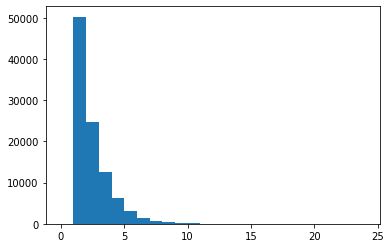

In [49]:
count, bins, _ = plt.hist(tosses, bins=list(range(25)))

In [68]:
np.max(tosses), count[np.max(tosses)]

(19, 1.0)

Though it is difficult to see on the histogram, there are a few trials with over 11 coin tosses. Each of those trials would payout over \\$1,000. With the seed we set, we even observe one trial with *19* tosses. That's a payout of \\$524,288 which we have only a 1 in 524,288 chance of seeing. We were lucky to see this rare of a trial with a sample size of only 100,000. And yet, even with these ridiculous payouts, the average size of one is only \\$26.65. Therefore, any reasonable person would likely never pay more than this amount in order to play this game.

## Using Data to Infer Risk Tolerance

Another useful thing we can do with this is to try to infer the risk tolerance of a decision maker. This course focuses more on the how to make decisions rather than how to infer another's decision-making preferences. However, this will be a great example of probabilistic modeling with PyMC3. To learn more about this, you can go to the PyMC3 section of the course.

## Examples

## Alternative Utility Functions
### Isoelastic Utility

* Has a risk aversion parameter and can model risk seeking behavior (something our current utility function cannot do).
* The isoelastic utility function has the form $u(c) = \frac{c^{1 - \eta} - 1}{\eta - 1}$, where $\eta$ is the risk aversion parameter. This is function holds except when $\eta = 1$, in which case the function $u(c) = \ln(c)$ is used instead.

### Prospect Theory and Marginal Utility

* Prospect theory takes a different view of utility and assumes that decision makers choose things that give them the most utility *on the margin*. It proposes that decision makers have an internal *marginal* utility function which takes into account changes in their status quo.
* The authors of the paper (here) suggest that the marginal utility function is much steeper on the negative side of the x-axis as opposed to the positive side. They observed that test participants were much more sensitive to losses than they were to gains of equal magnitude. They propose this assymetrical utility function for this reason.
* They also support the idea of diminishing marginal returns (and losses) for each marginal gain or loss.

In [126]:
def margin_util(x: np.array, a: float): # a is a person's loss aversion
    # This is necessary but avoids printing an irrelevant warning
    import warnings
    warnings.simplefilter('ignore', category=RuntimeWarning)
    
    return np.where(x < 0.0, -a*np.sqrt(np.abs(x)), np.sqrt(x))

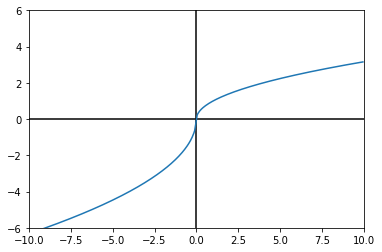

In [118]:
x = np.append(np.arange(-10,-.05,.05), np.arange(.05,10,.05))
plt.xlim(-10,10)
plt.ylim(-6,6)
plt.hlines(0, -10, 10, colors='black')
plt.vlines(0, -6, 6, colors='black')
plt.plot(x, margin_util(x,2))
plt.show()